<a href="https://colab.research.google.com/github/ScriptSherpa/AI-and-Ml-journey/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:

df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]


In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

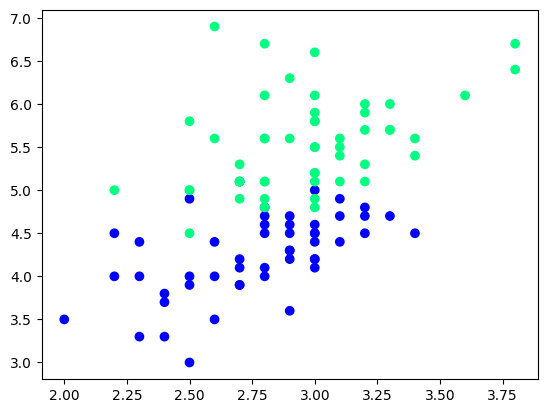

In [13]:

plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:

df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
54,2.8,4.6,1
76,2.8,4.8,1
85,3.4,4.5,1
60,2.0,3.5,1
106,2.5,4.5,2
97,2.9,4.3,1
61,3.0,4.2,1
57,2.4,3.3,1
88,3.0,4.1,1


In [18]:

# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)


In [19]:
df_val = df.iloc[60:80,:].sample(5)
df_val

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
60,2.0,3.5,1
122,2.8,6.7,2
58,2.9,4.6,1
149,3.0,5.1,2


In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
54,2.8,4.6,1
76,2.8,4.8,1
85,3.4,4.5,1
60,2.0,3.5,1
106,2.5,4.5,2
97,2.9,4.3,1
61,3.0,4.2,1
57,2.4,3.3,1
88,3.0,4.1,1


In [20]:
df_test = df.iloc[80:,:].sample(5)
df_test

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
51,3.2,4.5,1
106,2.5,4.5,2
148,3.4,5.4,2
72,2.5,4.9,1


In [21]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [22]:

y_test

array([2, 1, 2, 1, 2])

Case 1 - Bagging

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
83,2.7,5.1,1
66,3.0,4.5,1
74,2.9,4.3,1
147,3.0,5.2,2
68,2.2,4.5,1
134,2.6,5.6,2
147,3.0,5.2,2


In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [26]:
dt_bag1 = DecisionTreeClassifier()


In [27]:
evaluate(dt_bag1,X,y)


NameError: name 'evaluate' is not defined

In [28]:

# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
74,2.9,4.3,1
74,2.9,4.3,1
74,2.9,4.3,1
134,2.6,5.6,2
146,2.5,5.0,2
103,2.9,5.6,2
138,3.0,4.8,2


In [29]:

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

NameError: name 'evaluate' is not defined

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

In [ ]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [ ]:

def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


In [ ]:

df_test

In [ ]:

# Row sampling without replacement
df_train

In [ ]:

df_train.sample(8)